# Handwritten Digit Recognition with Neural Networks
- This notebook demonstrates how to build and train two different neural network models for handwritten digit recognition using the MNIST dataset.
- The first model is a simple feedforward neural network, and the second is a convolutional neural network (CNN).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


## Load and Preprocess the MNIST Dataset
Loads the MNIST dataset, normalizes the pixel values to the 0,1 range, flattens the 28×28 images into 1D vectors for use in a feedforward neural network, and converts the integer labels into one-hot encoded vectors for multi-class classification.

In [ ]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Flatten images for the feedforward network
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

# One-hot encode the labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Feedforward Neural Network
- A feedforward neural network is defined with one hidden layer of 512 ReLU units and a dropout layer to prevent overfitting.
- The output layer uses softmax for multi-class classification.
- The model is compiled with the Adam optimizer and categorical crossentropy loss.
- Trained for 10 epochs on the MNIST training set with 20% used for validation.


In [ ]:
# Define the model
ff_model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compile the model
ff_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Train the model
ff_history = ff_model.fit(x_train_flat, y_train_cat,
                          epochs=10,
                          batch_size=128,
                          validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8468 - loss: 0.5400 - val_accuracy: 0.9566 - val_loss: 0.1534
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9563 - loss: 0.1529 - val_accuracy: 0.9667 - val_loss: 0.1163
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9724 - loss: 0.0980 - val_accuracy: 0.9731 - val_loss: 0.0953
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9782 - loss: 0.0739 - val_accuracy: 0.9729 - val_loss: 0.0858
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9824 - loss: 0.0568 - val_accuracy: 0.9766 - val_loss: 0.0790
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9863 - loss: 0.0466 - val_accuracy: 0.9769 - val_loss: 0.0751
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9893 - loss: 0.0362 - val_accuracy: 0.9793 - val_loss: 0.0722
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9929 - loss: 0.0283 - val_accurac

### Evaluate Feedforward Model
- The trained feedforward model is evaluated on the test set, returning the loss and accuracy.
- The test accuracy is then printed with four decimal places.

In [ ]:
ff_test_loss, ff_test_acc = ff_model.evaluate(x_test_flat, y_test_cat)
print(f"Test accuracy: {ff_test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9761 - loss: 0.0820
Test accuracy: 0.9791


## Convolutional Neural Network (CNN)
- The training and test images are reshaped to include a channel dimension for the CNN.
- A CNN is defined with two convolutional and max pooling layers, followed by a dense hidden layer and a softmax output layer.
- The model is compiled with Adam and categorical crossentropy, and trained for 10 epochs using 20% of the training data for validation.

In [ ]:
# Reshape data for CNN
x_train_cnn = x_train.reshape((-1, 28, 28, 1))
x_test_cnn = x_test.reshape((-1, 28, 28, 1))

# Define the CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(x_train_cnn, y_train_cat,
                            epochs=10,
                            batch_size=128,
                            validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.8162 - loss: 0.6288 - val_accuracy: 0.9733 - val_loss: 0.0879
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 84ms/step - accuracy: 0.9762 - loss: 0.0783 - val_accuracy: 0.9812 - val_loss: 0.0627
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 89ms/step - accuracy: 0.9839 - loss: 0.0515 - val_accuracy: 0.9840 - val_loss: 0.0490
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 87ms/step - accuracy: 0.9882 - loss: 0.0379 - val_accuracy: 0.9864 - val_loss: 0.0435
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - accuracy: 0.9906 - loss: 0.0309 - val_accuracy: 0.9853 - val_loss: 0.0486
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.9930 - loss: 0.0225 - val_accuracy: 0.9871 - val_loss: 0.0435
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - accuracy: 0.9940 - loss: 0.0189 - val_accuracy: 0.9897 - val_loss: 0.0367
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.9952 - loss: 0.0162 - 

### Evaluate CNN Model
- The trained CNN model is evaluated on the test set to compute the loss and accuracy.
- The test accuracy is then printed with four decimal places.

In [ ]:
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test_cat)
print(f"Test accuracy: {cnn_test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9880 - loss: 0.0401
Test accuracy: 0.9910


## Visualize Training History
- This function plots the training and validation accuracy over the training epochs using the history object from model training.
- It adds a title, axis labels, legend, and grid for better readability.

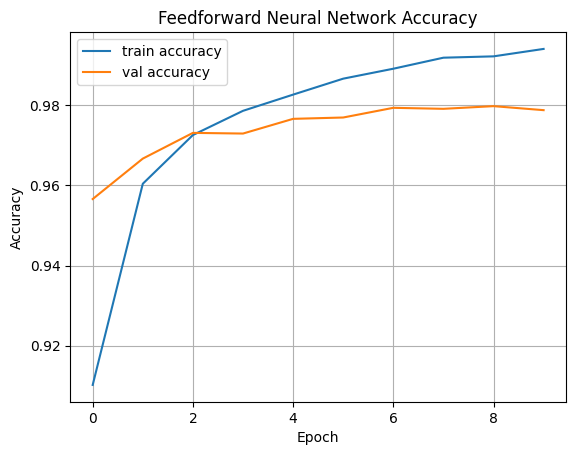

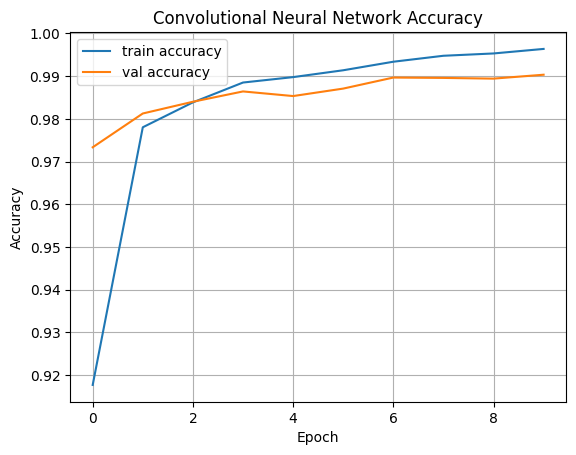

In [ ]:
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
plot_history(ff_history, "Feedforward Neural Network Accuracy")
plot_history(cnn_history, "Convolutional Neural Network Accuracy")